In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read the file
df = pd.read_csv("Bechdel_detailed.csv")
#drop unuseful columns
df = df.drop(columns = ['Unnamed: 0', "id", "submitterid", "visible","date"])
#first insight into db
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9373.0,1.995967e+03,2.507238e+01,1874.0,1988.0,2006.0,2013.0,2021.0
rating,9373.0,2.123653e+00,1.105398e+00,0.0,1.0,3.0,3.0,3.0
dubious,9074.0,8.926603e-02,2.851431e-01,0.0,0.0,0.0,0.0,1.0
imdbid,9373.0,1.481312e+06,2.210870e+06,1.0,99731.0,423382.0,1869716.0,15943414.0


In [3]:
#check if there are duplicates and delete the ones
df.duplicated().sum()
df.drop_duplicates(inplace = True)
#check for null values
df.isnull().sum()
#just dubious has missing values so we will keep it 

title        0
year         0
rating       0
dubious    299
imdbid       0
dtype: int64

In [4]:
#open IMDB db
imdb = pd.read_csv('movie_metadata.csv')
#drop unesuful columns
imdb = imdb.drop(columns = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'actor_1_name',
        'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'num_user_for_reviews', 
        'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes'])
# #check if there are duplicates and delete the ones
imdb.duplicated().sum()
imdb.drop_duplicates(inplace = True)
imdb

,gross,genres,movie_title,movie_imdb_link,language,country,content_rating,budget,title_year,imdb_score
0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,237000000.0,2009.0,7.9
1,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,300000000.0,2007.0,7.1
2,200074175.0,Action|Adventure|Thriller,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,245000000.0,2015.0,6.8
3,448130642.0,Action|Thriller,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,250000000.0,2012.0,8.5
4,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...
5038,NaN,Comedy|Drama,Signed Sealed Delivered,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,English,Canada,NaN,NaN,2013.0,7.7
5039,NaN,Crime|Drama|Mystery|Thriller,The Following,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14,NaN,NaN,7.5
5040,NaN,Drama|Horror|Thriller,A Plague So Pleasant,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN,1400.0,2013.0,6.3
5041,10443.0,Comedy|Drama|Romance,Shanghai Calling,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13,NaN,2012.0,6.3


In [5]:
#transform the imdb movie link to an id for merging purposes
imdb['imdbid']= imdb['movie_imdb_link'].apply(lambda x:float(str(x).split("/")[4][2:]))
#merge the two df
merged_df = pd.merge(df, imdb, how='inner', on=['imdbid'])
# display(merged_df)
#transform year in datetime
df['year'] = pd.to_datetime(merged_df['title_year'].astype(float), format='%Y')
# drop the unesuful column of both (title is well written in the imbdb one so keep that one)
merged_df = merged_df.drop(columns = ['title','title_year','movie_imdb_link','imdbid'])
display(merged_df)

,year,rating,dubious,gross,genres,movie_title,language,country,content_rating,budget,imdb_score
0,1916.0,0.0,0.0,NaN,Drama|History|War,Intolerance: Love's Struggle Throughout the Ages,NaN,USA,Not Rated,385907.0,8.0
1,1925.0,2.0,0.0,NaN,Drama|Romance|War,The Big Parade,NaN,USA,Not Rated,245000.0,8.3
2,1927.0,1.0,0.0,26435.0,Drama|Sci-Fi,Metropolis,German,Germany,Not Rated,6000000.0,8.3
3,1929.0,3.0,1.0,9950.0,Crime|Drama|Romance,Pandora's Box,German,Germany,Not Rated,NaN,8.0
4,1929.0,3.0,0.0,2808000.0,Musical|Romance,The Broadway Melody,English,USA,Passed,379000.0,6.3
...,...,...,...,...,...,...,...,...,...,...,...
2842,2016.0,1.0,0.0,107225164.0,Action|Animation|Comedy|Family,The Angry Birds Movie,English,USA,PG,73000000.0,6.3
2843,2016.0,2.0,0.0,35537564.0,Comedy,Dirty Grandpa,English,USA,R,11500000.0,6.0
2844,2016.0,1.0,0.0,NaN,Adventure|Drama|History,Ben-Hur,English,USA,PG-13,NaN,6.1
2845,2016.0,1.0,0.0,NaN,Adventure|Drama|History,Ben-Hur,English,USA,PG-13,100000000.0,6.1


In [6]:
#check for null values
merged_df.isnull().sum() 

year                0
rating              0
dubious           224
gross             210
genres              0
movie_title         0
language            3
country             0
content_rating     32
budget            151
imdb_score          0
dtype: int64

In [7]:
#check the movies with missing year
merged_df[merged_df['year'].isnull()]
#drop those rows
merged_df = merged_df[merged_df['year'].notna()]
#check the movies with missing language
merged_df[merged_df['language'].isnull()]
#all the missing language are 'English', so fill the missing values
merged_df['language'] = merged_df['language'].fillna('English')

In [8]:
#check for duplicates
merged_df.duplicated().sum()

0

In [9]:
merged_df
#we can see there are some more duplicates with small differences, decide how to treat them

,year,rating,dubious,gross,genres,movie_title,language,country,content_rating,budget,imdb_score
0,1916.0,0.0,0.0,NaN,Drama|History|War,Intolerance: Love's Struggle Throughout the Ages,English,USA,Not Rated,385907.0,8.0
1,1925.0,2.0,0.0,NaN,Drama|Romance|War,The Big Parade,English,USA,Not Rated,245000.0,8.3
2,1927.0,1.0,0.0,26435.0,Drama|Sci-Fi,Metropolis,German,Germany,Not Rated,6000000.0,8.3
3,1929.0,3.0,1.0,9950.0,Crime|Drama|Romance,Pandora's Box,German,Germany,Not Rated,NaN,8.0
4,1929.0,3.0,0.0,2808000.0,Musical|Romance,The Broadway Melody,English,USA,Passed,379000.0,6.3
...,...,...,...,...,...,...,...,...,...,...,...
2842,2016.0,1.0,0.0,107225164.0,Action|Animation|Comedy|Family,The Angry Birds Movie,English,USA,PG,73000000.0,6.3
2843,2016.0,2.0,0.0,35537564.0,Comedy,Dirty Grandpa,English,USA,R,11500000.0,6.0
2844,2016.0,1.0,0.0,NaN,Adventure|Drama|History,Ben-Hur,English,USA,PG-13,NaN,6.1
2845,2016.0,1.0,0.0,NaN,Adventure|Drama|History,Ben-Hur,English,USA,PG-13,100000000.0,6.1


In [10]:
merged_df['movie_title'].describe()

count         2847
unique        2843
top       Ben-Hur 
freq             3
Name: movie_title, dtype: object

In [11]:
#a couple of movies appear twice
#remove movies with same year and title
merged_df = merged_df.drop(merged_df.loc[merged_df.duplicated(['movie_title','year'])].index)
#check if it worked
merged_df['movie_title'].describe()

count          2844
unique         2843
top       The Host 
freq              2
Name: movie_title, dtype: object

In [12]:
#divide genre into list for easier use
merged_df['genres']= merged_df['genres'].apply(lambda x:(str(x).split("|")))
merged_df

,year,rating,dubious,gross,genres,movie_title,language,country,content_rating,budget,imdb_score
0,1916.0,0.0,0.0,NaN,"[Drama, History, War]",Intolerance: Love's Struggle Throughout the Ages,English,USA,Not Rated,385907.0,8.0
1,1925.0,2.0,0.0,NaN,"[Drama, Romance, War]",The Big Parade,English,USA,Not Rated,245000.0,8.3
2,1927.0,1.0,0.0,26435.0,"[Drama, Sci-Fi]",Metropolis,German,Germany,Not Rated,6000000.0,8.3
3,1929.0,3.0,1.0,9950.0,"[Crime, Drama, Romance]",Pandora's Box,German,Germany,Not Rated,NaN,8.0
4,1929.0,3.0,0.0,2808000.0,"[Musical, Romance]",The Broadway Melody,English,USA,Passed,379000.0,6.3
...,...,...,...,...,...,...,...,...,...,...,...
2840,2016.0,1.0,0.0,NaN,"[Biography, Drama]",The Birth of a Nation,English,USA,R,10000000.0,5.4
2841,2016.0,2.0,0.0,9658370.0,"[Comedy, Romance]",The Perfect Match,English,USA,R,5000000.0,4.5
2842,2016.0,1.0,0.0,107225164.0,"[Action, Animation, Comedy, Family]",The Angry Birds Movie,English,USA,PG,73000000.0,6.3
2843,2016.0,2.0,0.0,35537564.0,[Comedy],Dirty Grandpa,English,USA,R,11500000.0,6.0


## visualizations

In [13]:
import plotly.express as px

<AxesSubplot:ylabel='rating'>

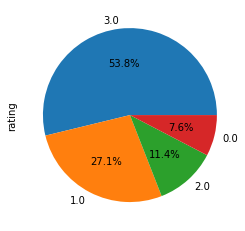

In [14]:
#distribution of the ratings
merged_df['rating'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='rating'>

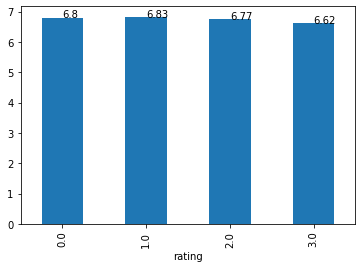

In [15]:
#average imbd rating score per rating
rating_score_average = merged_df['imdb_score'].groupby(merged_df['rating']).mean()
for index, value in enumerate(rating_score_average):
    plt.text(index,value, float(round(value, 2)))
rating_score_average.plot.bar()

content_rating,G,PG,PG-13,R
rating,,,,
0.0,10,25,62,101
1.0,21,127,239,337
2.0,4,40,116,144
3.0,37,238,534,630


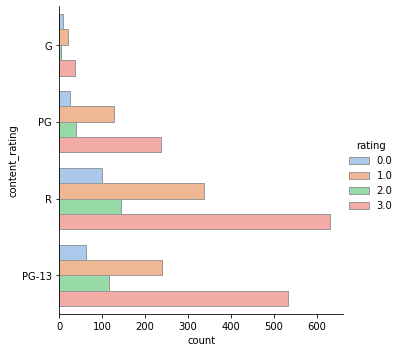

In [16]:
# test score and content rating
content_list = merged_df.loc[(merged_df['content_rating'] == 'G') | (merged_df['content_rating'] == 'PG')
                            | (merged_df['content_rating'] == 'PG-13') | (merged_df['content_rating'] == 'R')]

content_count = content_list.pivot_table(values= 'movie_title', index= 'rating', columns= 'content_rating', aggfunc= 'count')
display(content_count)
sns.catplot(y= "content_rating", hue= "rating", kind= "count",
            palette= "pastel", edgecolor= ".6",
            data= content_list)

# i think its best if we use content rating of G PG R and PG-13
# how to extract them from the dataframe and t

country
France      86
UK         276
USA       2195
Name: rating, dtype: int64

country,France,UK,USA
rating,,,
0.0,10,21,163
1.0,20,82,581
2.0,6,34,266
3.0,50,139,1185


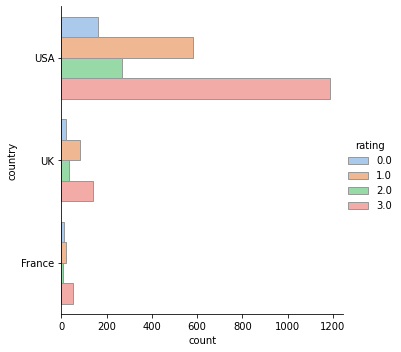

In [17]:
# test score and country
country_list = merged_df['rating'].groupby(merged_df['country']).count()
country_list = country_list.loc[(country_list >= 75)]
display(country_list)
country_count = merged_df.loc[(merged_df['country'] == 'France') | (merged_df['country'] == 'UK')
                            | (merged_df['country'] == 'USA')]

country_rating = country_count.pivot_table(values= 'movie_title', index= 'rating', columns= 'country', aggfunc= 'count')
display(country_rating)

sns.catplot(y="country", hue="rating", kind="count",
            palette="pastel", edgecolor=".6",
            data=country_count)

# maybe we should filter out countries with fewer movies

year,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
rating,,,,,,,,,,,,,,,,,
0.0,9,11,9,8,4,10,9,9,7,13,12,11,7,8,8,9,3
1.0,19,25,38,23,27,26,35,24,39,50,39,55,31,29,40,28,10
2.0,13,7,16,7,12,13,10,9,11,16,12,12,19,14,20,13,12
3.0,43,54,55,53,71,68,74,63,70,78,89,88,75,96,79,58,40


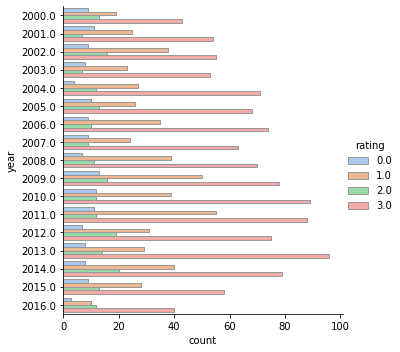

In [18]:
# test score and year
new_movies = merged_df.loc[merged_df['year'] >= 2000]
new_movie_list = new_movies.pivot_table(values= 'movie_title', index= 'rating', columns='year', aggfunc= 'count')
display(new_movie_list)
sns.catplot(y="year", hue="rating", kind="count",
            palette="pastel", edgecolor=".6",
            data=new_movies)

In [19]:
# test score and genres
